<a href="https://colab.research.google.com/github/AlexBB999/Classwork/blob/master/Data_Cleaning_14_5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import the SQL ALchemy engine
from sqlalchemy import create_engine

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

In [0]:
warnings.filterwarnings('ignore')
#sns.set(style="whitegrid")

In [0]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db =  'studentsperformance'

In [0]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

In [0]:
sp1 = pd.read_sql_query('select * FROM studentsperformance',con=engine)
#educate= engine.execute('SELECT * FROM student performance' )
engine.dispose()

In [147]:
sp2=sp1.copy()
sp2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [0]:
spe=sp1.copy()

In [0]:
spe.set_index(['race/ethnicity'],inplace=True)

In [0]:
#list(df.index.values) 
#list(spe.index.values) 

In [152]:
spe.loc[['group B','group C'],:]

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
race/ethnicity,,,,,,,
group B,female,bachelor's degree,standard,none,72,72,74
group B,female,master's degree,standard,none,90,95,93
group B,female,associate's degree,standard,none,71,83,78
group B,female,some college,standard,completed,88,95,92
group B,male,some college,free/reduced,none,40,43,39
...,...,...,...,...,...,...,...
group C,female,associate's degree,standard,none,91,95,94
group C,female,some high school,standard,none,74,75,82
group C,female,associate's degree,standard,none,40,59,51


In [158]:
spe.loc[d,['math score','reading score','writing score']]

,math score,reading score,writing score
race/ethnicity,,,
group B,72,72,74
group B,90,95,93
group B,71,83,78
group B,88,95,92
group B,40,43,39
...,...,...,...
group E,100,100,100
group E,68,76,67
group E,81,75,76


In [180]:
stats.ttest_ind(spe.loc[['group A'],['math score','reading score','writing score']],spe.loc[d3,['math score','reading score','writing score']])

Ttest_indResult(statistic=array([-3.0348354 , -3.0285393 , -3.53481986]), pvalue=array([0.00247611, 0.00252776, 0.00042892]))

In [181]:
stats.ttest_ind(spe.loc[['group A'],['math score','reading score','writing score']],spe.loc[['group B'],['math score','reading score','writing score']])

Ttest_indResult(statistic=array([-0.93550763, -1.36336823, -1.46244206]), pvalue=array([0.3503416 , 0.17387355, 0.14475374]))

In [182]:
stats.ttest_ind(spe.loc[['group A','group B'],['math score','reading score','writing score']],spe.loc[['group C','group D'],['math score','reading score','writing score']])

Ttest_indResult(statistic=array([-2.71279058, -2.88132655, -3.84253393]), pvalue=array([0.00680555, 0.00405879, 0.00013075]))

In [0]:
d=sp2['race/ethnicity'].unique()

In [171]:
l2=list(d)

None


In [0]:
d4=d

In [206]:
count=0
limit=len(d)*(len(d4)-1)/2
for a in d:
  for b in d4:
    if a!=b:
     count=count+1
     #if count<=limit:
    print( stats.ttest_ind(spe.loc[[a],['math score','reading score','writing score']],spe.loc[[b],['math score','reading score','writing score']]), a,b,count)
     #count=count+1

Ttest_indResult(statistic=array([0., 0., 0.]), pvalue=array([1., 1., 1.])) group B group B 0
Ttest_indResult(statistic=array([-0.73156699, -1.32231562, -1.59649634]), pvalue=array([0.46477089, 0.18665928, 0.1110011 ])) group B group C 1
Ttest_indResult(statistic=array([0.93550763, 1.36336823, 1.46244206]), pvalue=array([0.3503416 , 0.17387355, 0.14475374])) group B group A 2
Ttest_indResult(statistic=array([-2.8284554 , -1.94515636, -3.19929333]), pvalue=array([0.0048862 , 0.05237862, 0.001475  ])) group B group D 3
Ttest_indResult(statistic=array([-6.00739705, -3.38606695, -3.38319783]), pvalue=array([5.00794605e-09, 7.95161850e-04, 8.03230049e-04])) group B group E 4
Ttest_indResult(statistic=array([0.73156699, 1.32231562, 1.59649634]), pvalue=array([0.46477089, 0.18665928, 0.1110011 ])) group C group B 5
Ttest_indResult(statistic=array([0., 0., 0.]), pvalue=array([1., 1., 1.])) group C group C 5
Ttest_indResult(statistic=array([1.59972203, 2.57543222, 2.8488724 ]), pvalue=array([0.1

In [204]:
d

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [197]:
limit=len(a)*(len(b)-1)/2
limit

21.0

In [177]:
d2=d[::-1]
d3=d2[0:4]
d3

array(['group E', 'group D', 'group A', 'group C'], dtype=object)

In [0]:
list(spe)

['gender',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [0]:
spe.loc['group B','math score']

race/ethnicity
group B    72
group B    90
group B    71
group B    88
group B    40
           ..
group B    75
group B    60
group B     8
group B    79
group B    65
Name: math score, Length: 190, dtype: int64

In [0]:
spe.loc[:,'math score']

race/ethnicity
group B    72
group C    69
group B    90
group A    47
group C    76
           ..
group E    88
group C    62
group C    59
group D    68
group D    77
Name: math score, Length: 1000, dtype: int64

In [0]:
stats.ttest_ind()

In [0]:
sp2.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [0]:
sp2.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [0]:
sp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [0]:
sp2.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?


Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?


Does the test preparation course seem to have an effect on the exam performances?


Which 2 exam scores are most correlated with each other?

1 -**Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?**

so compare exam performance to gender -- ethnicity -- parental level of education

exams are continuous -- others categorical

In [0]:
sp_male=sp2[sp2['gender']=='male']

In [0]:
sp_male.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
10,male,group C,associate's degree,standard,none,58,54,52


In [0]:
sp_female=sp2[sp2['gender']=='female']

In [0]:
stats.ttest_ind(sp_male['math score'],sp_female['math score'])

Ttest_indResult(statistic=5.383245869828983, pvalue=9.120185549328822e-08)

In [0]:
stats.ttest_ind(sp_male[['math score','reading score','writing score']],sp_female[['math score','reading score','writing score']])

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [0]:
sp_male[['math score','reading score','writing score']].head()

,math score,reading score,writing score
3,47,57,44
4,76,78,75
7,40,43,39
8,64,64,67
10,58,54,52


another way


In [0]:
#temp.loc[1,:]
#sp2.loc[:,'gender']

does not work because gender is not the key

In [0]:
sp2.groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [0]:
ttest_ind()

In [0]:
sg=sp2.groupby('race/ethnicity').mean()

In [0]:
sg['math score']

race/ethnicity
group A    61.629213
group B    63.452632
group C    64.463950
group D    67.362595
group E    73.821429
Name: math score, dtype: float64

In [0]:
sp

In [0]:
sp2.groupby('parental level of education').mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


**Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?**

In [0]:
sp2.groupby('lunch').mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


yes

explanation -- students with free/reduced came from poorer homes

**Does the test preparation course seem to have an effect on the exam performances?**

In [0]:
sp2.groupby('test preparation course').mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


**Which 2 exam scores are most correlated with each other?**

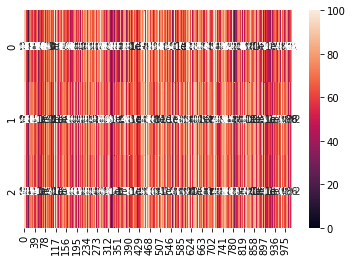

In [0]:
sns.heatmap([sp2['math score'],sp2['reading score'],sp2['writing score']],annot=True)

In [0]:
sp_subset=sp2[['math score','reading score','writing score']]

In [0]:
sp_subset.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [0]:
sp_subset.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


reading + writing  highest correlation